In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("Breast Cancer METABRIC.CSV")

In [2]:
print(df.head)
print(df.shape)
print(df.columns)
print(df.dtypes)

<bound method NDFrame.head of      Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0       MB-0000             75.65             Mastectomy  Breast Cancer   
1       MB-0002             43.19      Breast Conserving  Breast Cancer   
2       MB-0005             48.87             Mastectomy  Breast Cancer   
3       MB-0006             47.68             Mastectomy  Breast Cancer   
4       MB-0008             76.97             Mastectomy  Breast Cancer   
...         ...               ...                    ...            ...   
2504  MTS-T2428             70.05                    NaN  Breast Cancer   
2505  MTS-T2429             63.60                    NaN  Breast Cancer   
2506  MTS-T2430               NaN                    NaN  Breast Cancer   
2507  MTS-T2431               NaN                    NaN  Breast Cancer   
2508  MTS-T2432               NaN                    NaN  Breast Cancer   

                           Cancer Type Detailed Cellularity Chemother

In [3]:
categorical=df.select_dtypes(include=['object'])
unique= categorical.nunique()
print(unique)

Patient ID                        2509
Type of Breast Surgery               2
Cancer Type                          2
Cancer Type Detailed                 8
Cellularity                          3
Chemotherapy                         2
Pam50 + Claudin-low subtype          7
ER status measured by IHC            2
ER Status                            2
HER2 status measured by SNP6         4
HER2 Status                          2
Tumor Other Histologic Subtype       8
Hormone Therapy                      2
Inferred Menopausal State            2
Integrative Cluster                 11
Primary Tumor Laterality             2
Oncotree Code                        8
Overall Survival Status              2
PR Status                            2
Radio Therapy                        2
Relapse Free Status                  2
Sex                                  1
3-Gene classifier subtype            4
Patient's Vital Status               3
dtype: int64


In [4]:
print(df.describe())
summary_cate=categorical.describe()
print(summary_cate)

       Age at Diagnosis       Cohort  Neoplasm Histologic Grade  \
count       2498.000000  2498.000000                2388.000000   
mean          60.420300     2.900320                   2.412060   
std           13.032997     1.962216                   0.649363   
min           21.930000     1.000000                   1.000000   
25%           50.920000     1.000000                   2.000000   
50%           61.110000     3.000000                   3.000000   
75%           70.000000     4.000000                   3.000000   
max           96.290000     9.000000                   3.000000   

       Lymph nodes examined positive  Mutation Count  \
count                    2243.000000     2357.000000   
mean                        1.950513        5.578702   
std                         4.017774        3.967967   
min                         0.000000        1.000000   
25%                         0.000000        3.000000   
50%                         0.000000        5.000000   
75% 

In [5]:

# Example: Check for missing values
missing_summary = df.isnull().sum()
print(missing_summary)


Patient ID                          0
Age at Diagnosis                   11
Type of Breast Surgery            554
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                             11
ER status measured by IHC          83
ER Status                          40
Neoplasm Histologic Grade         121
HER2 status measured by SNP6      529
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive     266
Mutation Count                    152
Nottingham prognostic index       222
Oncotree Code                       0
Overall Survival (Months)         528
Overall Survival Status           528
PR Status                         529
Radio Therap

In [6]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


Patient ID                         0.000000
Age at Diagnosis                   0.438422
Type of Breast Surgery            22.080510
Cancer Type                        0.000000
Cancer Type Detailed               0.000000
Cellularity                       23.595058
Chemotherapy                      21.084097
Pam50 + Claudin-low subtype       21.084097
Cohort                             0.438422
ER status measured by IHC          3.308091
ER Status                          1.594261
Neoplasm Histologic Grade          4.822639
HER2 status measured by SNP6      21.084097
HER2 Status                       21.084097
Tumor Other Histologic Subtype     5.380630
Hormone Therapy                   21.084097
Inferred Menopausal State         21.084097
Integrative Cluster               21.084097
Primary Tumor Laterality          25.468314
Lymph nodes examined positive     10.601833
Mutation Count                     6.058191
Nottingham prognostic index        8.848147
Oncotree Code                   

In [7]:
%pip install missingno


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 11.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


Matplotlib is building the font cache; this may take a moment.


<Axes: >

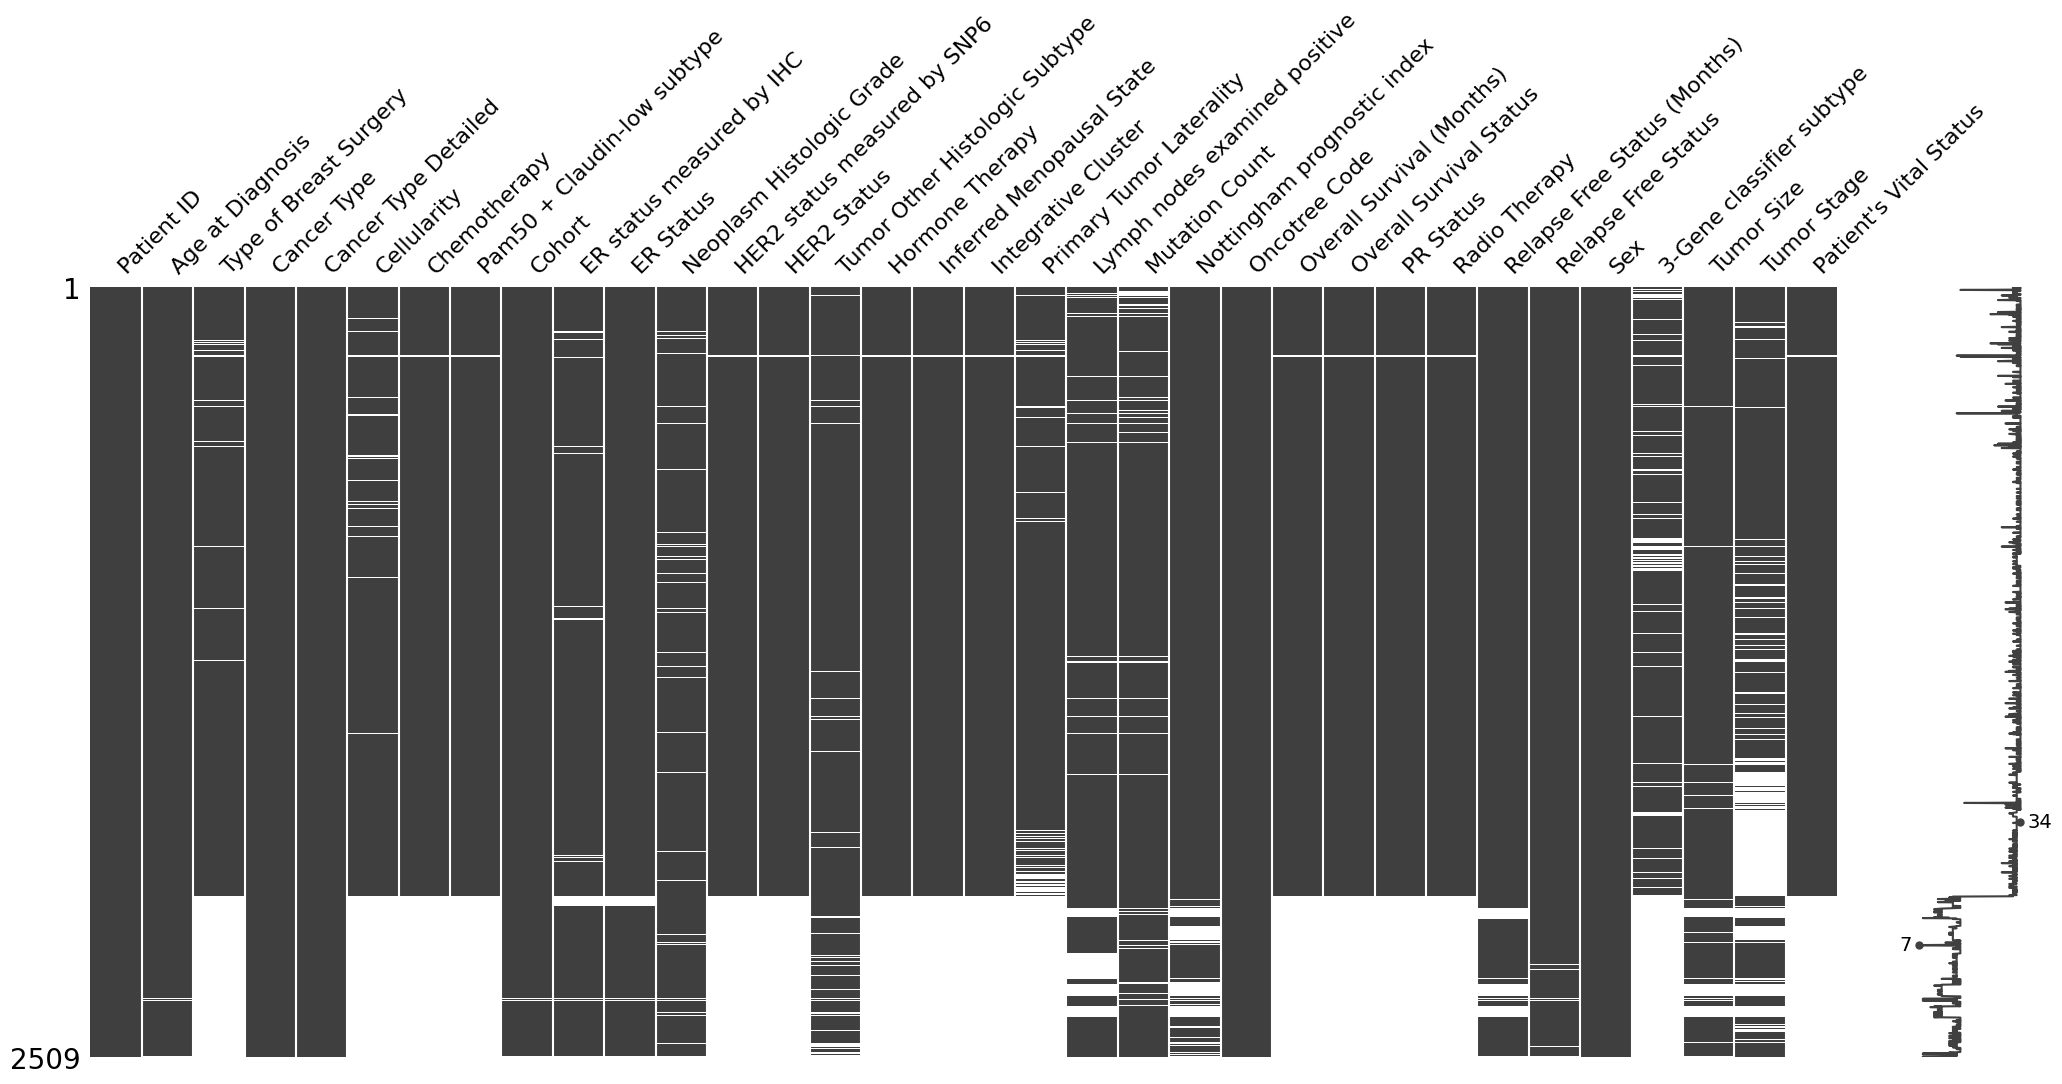

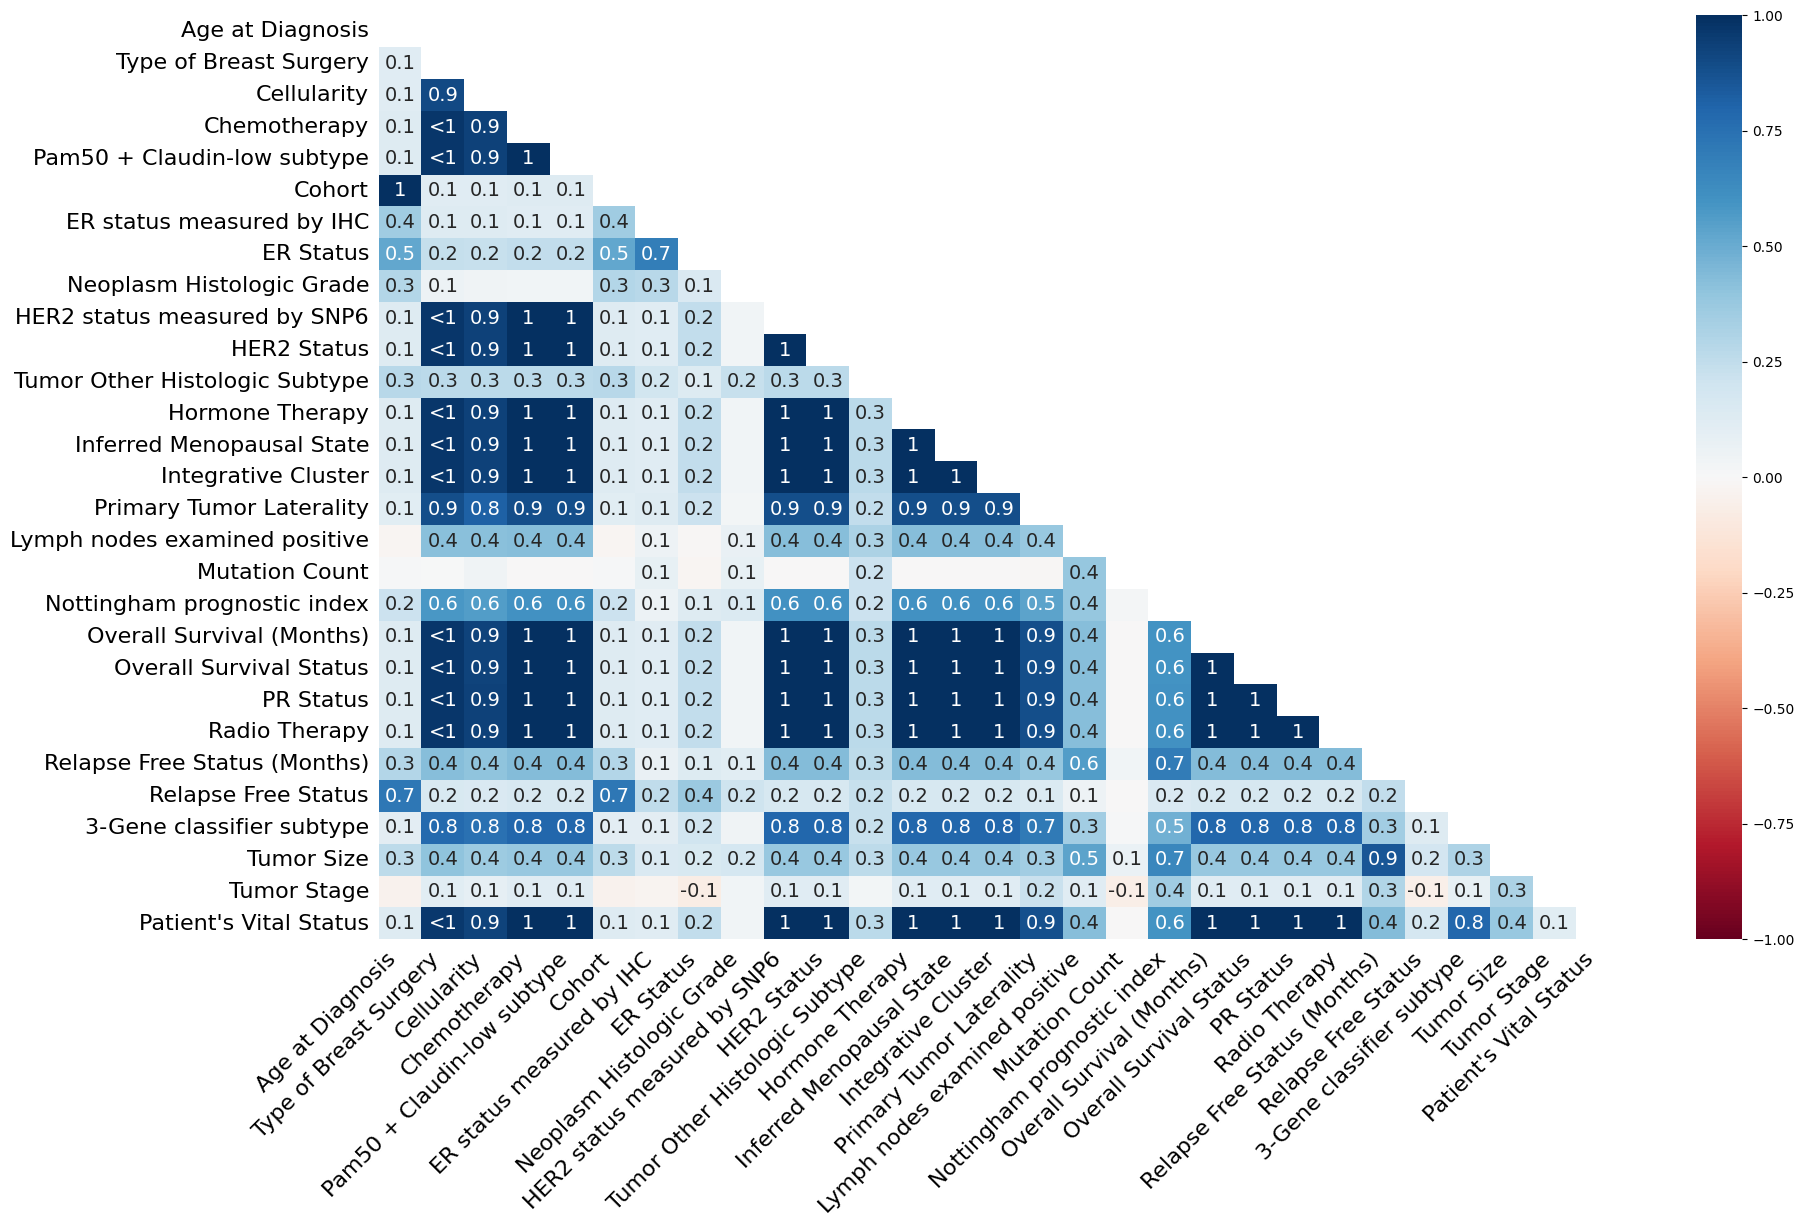

In [8]:
import missingno as msno

msno.matrix(df)
msno.heatmap(df)


In [9]:
#this line is to change an erroneous entry in the 'Cancer Type Detailed' column to NaN 

df.loc[df['Cancer Type Detailed'] == 'Breast', 'Cancer Type Detailed'] = np.nan


In [10]:
# Save original non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).copy()


In [11]:
%pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 4.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.impute import KNNImputer

In [13]:
# Convert categorical variables to numeric if needed
df_encoded = pd.get_dummies(df, drop_first=False)  # One-hot encoding


In [14]:
# Initialize KNN Imputer with the number of neighbors (default is 5)
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation (returns a numpy array)
df_imputed_array = imputer.fit_transform(df_encoded)

In [15]:
# Convert the imputed array back to a DataFrame
df_imputed = pd.DataFrame(df_imputed_array, columns=df_encoded.columns)

In [16]:
for column in non_numeric_columns.columns:
    related_columns = [col for col in df_imputed.columns if col.startswith(column + "_")]
    print(f"Related columns for {column}: {related_columns}")


Related columns for Patient ID: ['Patient ID_MB-0000', 'Patient ID_MB-0002', 'Patient ID_MB-0005', 'Patient ID_MB-0006', 'Patient ID_MB-0008', 'Patient ID_MB-0010', 'Patient ID_MB-0014', 'Patient ID_MB-0020', 'Patient ID_MB-0022', 'Patient ID_MB-0025', 'Patient ID_MB-0028', 'Patient ID_MB-0035', 'Patient ID_MB-0036', 'Patient ID_MB-0039', 'Patient ID_MB-0045', 'Patient ID_MB-0046', 'Patient ID_MB-0048', 'Patient ID_MB-0050', 'Patient ID_MB-0053', 'Patient ID_MB-0054', 'Patient ID_MB-0056', 'Patient ID_MB-0059', 'Patient ID_MB-0060', 'Patient ID_MB-0062', 'Patient ID_MB-0064', 'Patient ID_MB-0066', 'Patient ID_MB-0068', 'Patient ID_MB-0071', 'Patient ID_MB-0079', 'Patient ID_MB-0081', 'Patient ID_MB-0083', 'Patient ID_MB-0093', 'Patient ID_MB-0095', 'Patient ID_MB-0097', 'Patient ID_MB-0099', 'Patient ID_MB-0100', 'Patient ID_MB-0101', 'Patient ID_MB-0102', 'Patient ID_MB-0106', 'Patient ID_MB-0107', 'Patient ID_MB-0108', 'Patient ID_MB-0109', 'Patient ID_MB-0110', 'Patient ID_MB-0111',

In [17]:
# Map back each original non-numeric column
for column in non_numeric_columns.columns:
    # Get all one-hot encoded columns related to this original column
    related_columns = [col for col in df_imputed.columns if col.startswith(column + '_')]

    # Find the column with the maximum value (imputed category)
    df_imputed[column] = df_imputed[related_columns].idxmax(axis=1)

    # Remove the prefix to restore original category values
    df_imputed[column] = df_imputed[column].str.replace(column + "_", "")


In [18]:
df_final = df_imputed.drop(columns=[col for col in df_imputed.columns if "_" in col])


In [19]:
print(df_final.head())


   Age at Diagnosis  Cohort  Neoplasm Histologic Grade  \
0             75.65     1.0                        3.0   
1             43.19     1.0                        3.0   
2             48.87     1.0                        2.0   
3             47.68     1.0                        2.0   
4             76.97     1.0                        3.0   

   Lymph nodes examined positive  Mutation Count  Nottingham prognostic index  \
0                           10.0             5.2                        6.044   
1                            0.0             2.0                        4.020   
2                            1.0             2.0                        4.030   
3                            3.0             1.0                        4.050   
4                            8.0             2.0                        6.080   

   Overall Survival (Months)  Relapse Free Status (Months)  Tumor Size  \
0                 140.500000                        138.65        22.0   
1               

In [20]:
print(df_final.isnull().sum())  # Should return 0 for all columns


Age at Diagnosis                  0
Cohort                            0
Neoplasm Histologic Grade         0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Overall Survival (Months)         0
Relapse Free Status (Months)      0
Tumor Size                        0
Tumor Stage                       0
Patient ID                        0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
ER status measured by IHC         0
ER Status                         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Oncotree Code                     0
Overall Survival Status     

In [21]:
print("Original shape:", df.shape)
print("After encoding:", df_encoded.shape)
print("After imputation:", df_imputed.shape)
print("After mapping back:", df_final.shape)


Original shape: (2509, 34)
After encoding: (2509, 2601)
After imputation: (2509, 2625)
After mapping back: (2509, 34)


In [22]:
print(df.columns)  # Check the original columns


Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')


In [23]:
# Add the Patient ID column back from the original DataFrame
df_final['Patient ID'] = df['Patient ID']


In [24]:
# Align indices
df_final.index = df.index



In [25]:
print(df['Patient ID'].equals(df_final['Patient ID']))  # Should return True


True


In [26]:
# Move 'Patient ID' to the first column
columns = ['Patient ID'] + [col for col in df_final.columns if col != 'Patient ID']
df_final = df_final[columns]


In [27]:
print(df_final.head)
print(df_final.shape)
print(df_final.columns)
print(df_final.dtypes)

<bound method NDFrame.head of      Patient ID  Age at Diagnosis  Cohort  Neoplasm Histologic Grade  \
0       MB-0000             75.65     1.0                        3.0   
1       MB-0002             43.19     1.0                        3.0   
2       MB-0005             48.87     1.0                        2.0   
3       MB-0006             47.68     1.0                        2.0   
4       MB-0008             76.97     1.0                        3.0   
...         ...               ...     ...                        ...   
2504  MTS-T2428             70.05     1.0                        1.0   
2505  MTS-T2429             63.60     1.0                        2.0   
2506  MTS-T2430             58.40     7.0                        2.2   
2507  MTS-T2431             49.93     5.8                        2.6   
2508  MTS-T2432             46.40     7.0                        2.4   

      Lymph nodes examined positive  Mutation Count  \
0                              10.0             5.

In [28]:
# Check for missing values
missing_summary = df_final.isnull().sum()
print(missing_summary)

Patient ID                        0
Age at Diagnosis                  0
Cohort                            0
Neoplasm Histologic Grade         0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Overall Survival (Months)         0
Relapse Free Status (Months)      0
Tumor Size                        0
Tumor Stage                       0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
ER status measured by IHC         0
ER Status                         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Oncotree Code                     0
Overall Survival Status     

<Axes: >

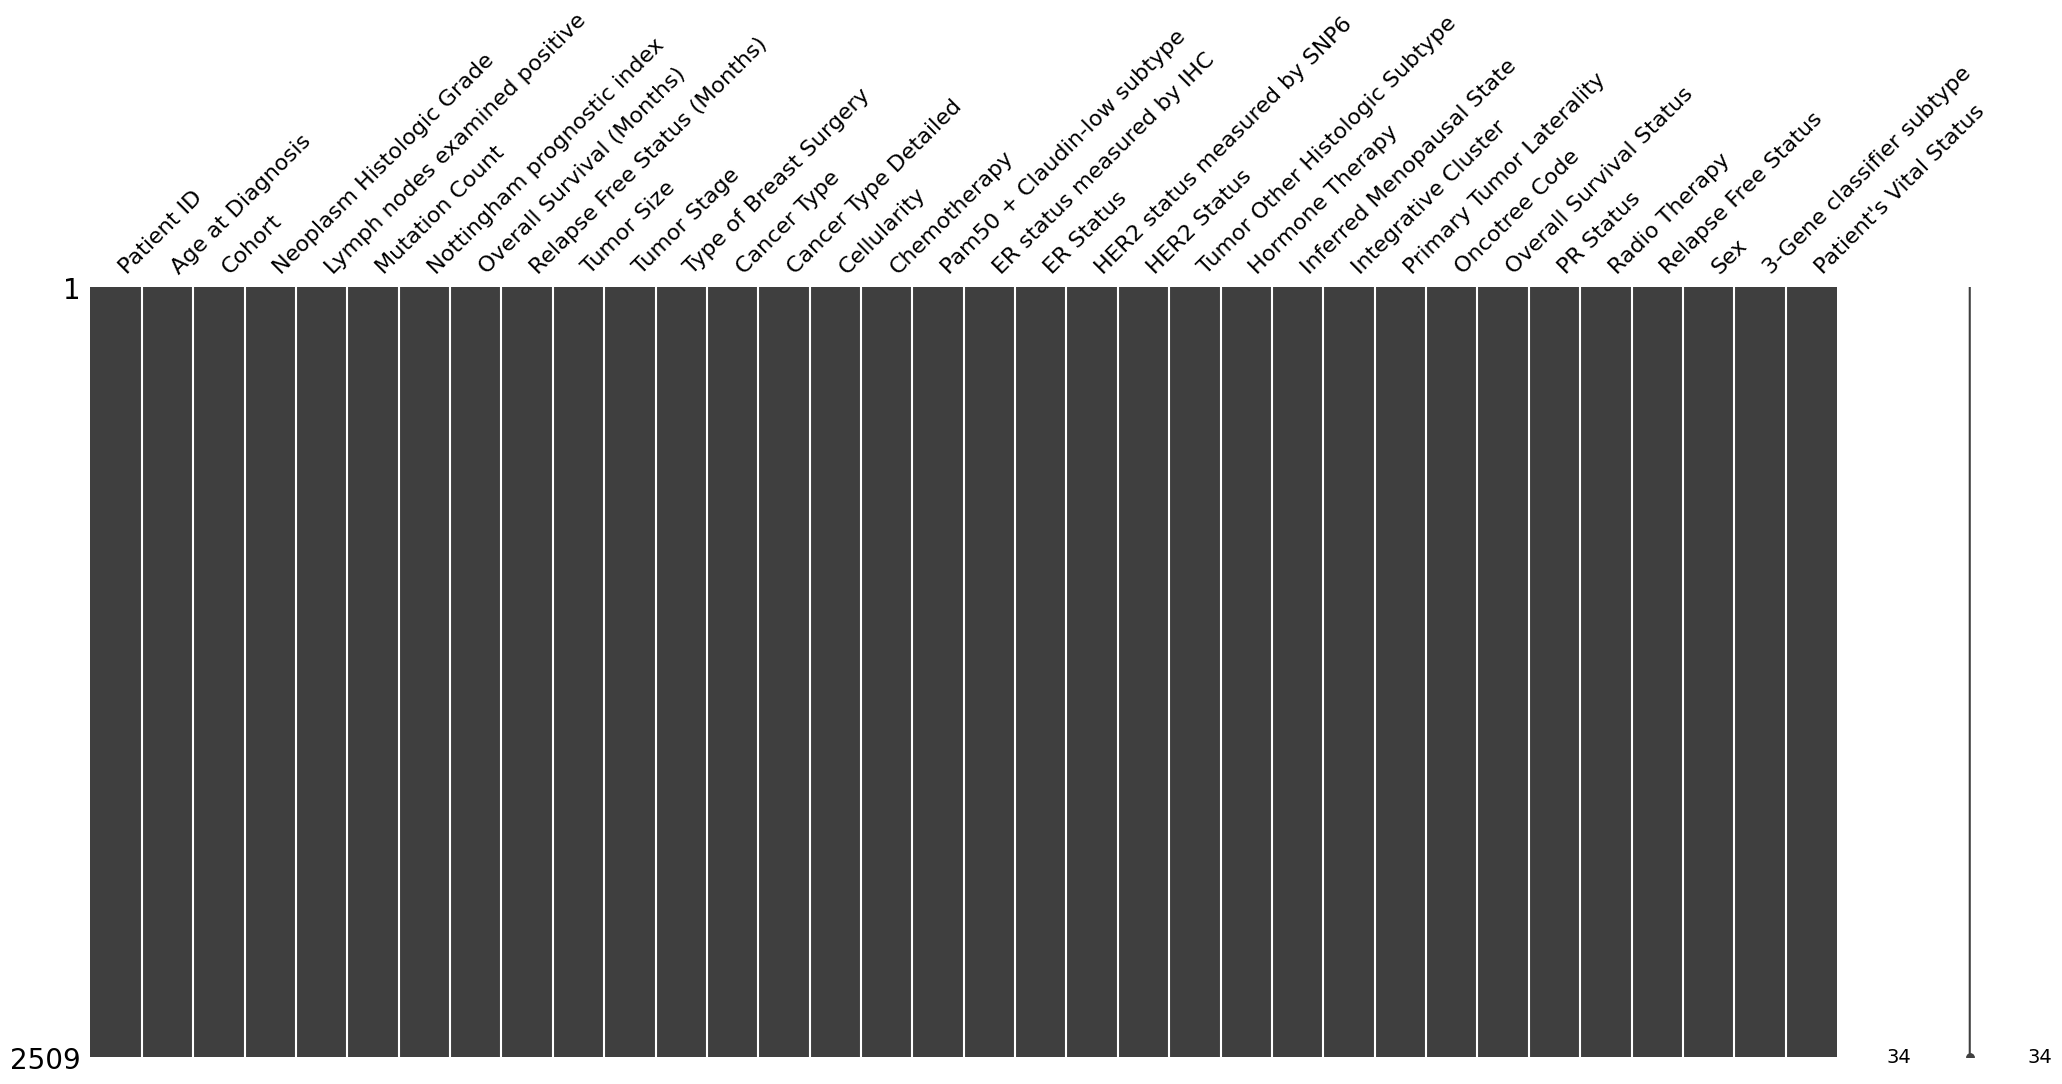

In [29]:
msno.matrix(df_final)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

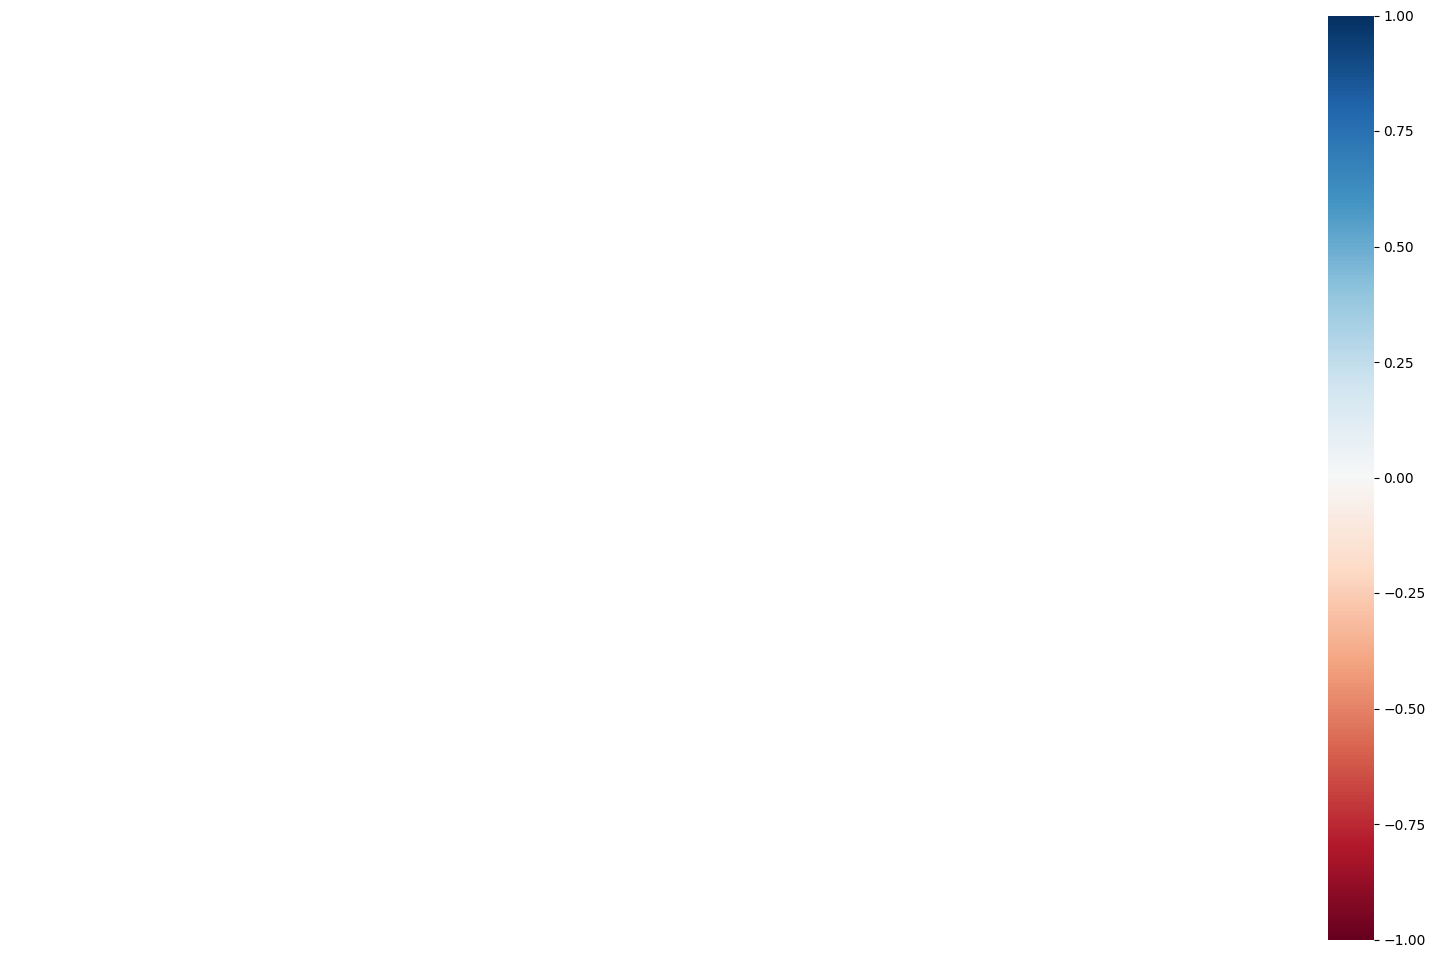

In [30]:
msno.heatmap(df_final)

In [32]:
# Save the cleaned DataFrame to a CSV file
df_final.to_csv('cleaned_breast_cancer_data.csv', index=False)
